In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.random_projection import SparseRandomProjection

from collections import Counter
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced

In [2]:
#Load y_train, x_test, y_test
x_train=pd.read_csv('../Data/text x_train.csv', usecols=range(1,2),header=None,names=['Text'])
y_train = pd.read_csv('../Data/text y_train.csv', usecols=range(1,2),header=None,names=['Label'])
x_test = pd.read_csv('../Data/text x_test.csv', usecols=range(1,2),header=None,names=['Text'])
y_test = pd.read_csv('../Data/text y_test.csv', usecols=range(1,2),header=None, names=['Label'])

In [3]:
print('Training class distributions summary: {}'.format(Counter(y_train['Label'].tolist())))
print('Test class distributions summary: {}'.format(Counter(y_test['Label'].tolist())))

Training class distributions summary: Counter({0: 47354, 1: 6940})
Test class distributions summary: Counter({0: 20295, 1: 2975})


# Bag of Words
***

## TF-IDF-based Logistic Regression
Term Frequency times inverse document frequency

In [4]:
%%time
#make pipeline. Feature extraction using TF-IDF, dimensionality reduction with a random projection, and a logistic regression model
pipe = make_pipeline(TfidfVectorizer(analyzer='word', token_pattern=r'\b[^\d\W]+\b', stop_words='english'),SparseRandomProjection(), LogisticRegression())
pipe.fit(x_train['Text'].tolist(), y_train['Label'].tolist())

C:\Users\cschu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 4min 53s


In [14]:
y_pred = pipe.predict(x_test['Text'].tolist())
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.99      0.16      0.94      0.39      0.17     20295
          1       0.64      0.16      0.99      0.25      0.39      0.14      2975

avg / total       0.86      0.88      0.26      0.85      0.39      0.17     23270



In [18]:
#Accuracy on test set
score=metrics.accuracy_score(y_test,y_pred)
score

0.8810915341641599

In [16]:
#Confusion matrix
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:
[[20033   262]
 [ 2505   470]]


# Balancing the class before classification
***

## Random under-sampling

In [20]:
%%time
#make pipeline. include random under sampling
under_sample_pipe = make_pipeline_imb(TfidfVectorizer(analyzer='word', token_pattern=r'\b[^\d\W]+\b', stop_words='english'),
                         SparseRandomProjection(),
                         RandomUnderSampler(),
                         LogisticRegression())

under_sample_pipe.fit(x_train['Text'].tolist(), y_train['Label'].tolist())

C:\Users\cschu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 1min 10s


In [21]:
#Make predictions on test set
y_pred = under_sample_pipe.predict(x_test['Text'].tolist())
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.72      0.75      0.82      0.73      0.54     20295
          1       0.28      0.75      0.72      0.41      0.73      0.54      2975

avg / total       0.87      0.72      0.74      0.77      0.73      0.54     23270



In [22]:
#Accuracy on test set
score=metrics.accuracy_score(y_test,y_pred)
score

0.72440911044263

In [23]:
#Confusion matrix
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:
[[14634  5661]
 [  752  2223]]


## Random over-sampling

In [27]:
%%time
#make pipeline. include random over sampling
over_sample_pipe = make_pipeline_imb(TfidfVectorizer(analyzer='word', token_pattern=r'\b[^\d\W]+\b', stop_words='english'),
                         SparseRandomProjection(),
                         RandomOverSampler(),
                         LogisticRegression())

over_sample_pipe.fit(x_train['Text'].tolist(), y_train['Label'].tolist())

C:\Users\cschu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 3min 8s


In [28]:
#Make predictions on test set
y_pred = over_sample_pipe.predict(x_test['Text'].tolist())
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.78      0.70      0.86      0.74      0.55     20295
          1       0.32      0.70      0.78      0.44      0.74      0.54      2975

avg / total       0.87      0.77      0.71      0.80      0.74      0.55     23270



In [29]:
#Accuracy on test set
score=metrics.accuracy_score(y_test,y_pred)
score

0.7700472711645896

In [30]:
#Confusion matrix
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion matrix:
[[15842  4453]
 [  898  2077]]


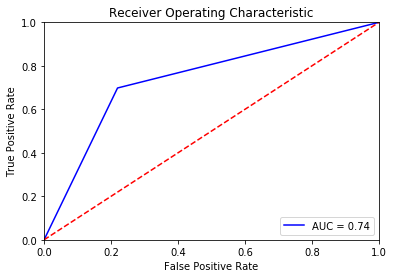

In [32]:
#ROC plot

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()